### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [45]:
data = pd.read_csv('data/coupons.csv')

In [46]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [47]:
# 2a. Dataset dimensions
print("=" * 50)
print("DATASET SHAPE")
print("=" * 50)
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

DATASET SHAPE
Rows: 12684
Columns: 26


In [48]:
# 2b. Data types
print("\n" + "=" * 50)
print("DATA TYPES")
print("=" * 50)
print(data.dtypes)



DATA TYPES
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [49]:
# 2c. Missing values
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing = data.isnull().sum()
missing_pct = (missing / len(data) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))



MISSING VALUES
                      Missing  Percent
car                     12576    99.15
CoffeeHouse               217     1.71
Restaurant20To50          189     1.49
CarryAway                 151     1.19
RestaurantLessThan20      130     1.02
Bar                       107     0.84


In [50]:
# 2d. Duplicates
print("\n" + "=" * 50)
print("DUPLICATES")
print("=" * 50)
print(f"Duplicate rows: {data.duplicated().sum()}")


DUPLICATES
Duplicate rows: 74


3. Decide what to do about your missing data -- drop, replace, other...

In [51]:
# 3a. Look at the 'car' column - what's even in there?
print("=" * 50)
print("CAR COLUMN - UNIQUE VALUES")
print("=" * 50)
print(data['car'].value_counts())
print(f"\nNon-null entries: {data['car'].notna().sum()} out of {len(data)}")

CAR COLUMN - UNIQUE VALUES
car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

Non-null entries: 108 out of 12684


In [52]:
# 3b. Decision: Drop the 'car' column (99% missing = useless)
print("\n" + "=" * 50)
print("DROPPING 'car' COLUMN")
print("=" * 50)
data = data.drop(columns=['car'])
print(f"New shape: {data.shape}")


DROPPING 'car' COLUMN
New shape: (12684, 25)


In [53]:
# 3c. Handle remaining missing values
# Check how many rows have ANY missing data now
print("\n" + "=" * 50)
print("REMAINING MISSING DATA")
print("=" * 50)
rows_with_missing = data.isnull().any(axis=1).sum()
print(f"Rows with missing values: {rows_with_missing}")
print(f"Percent of data: {(rows_with_missing / len(data) * 100):.2f}%")


REMAINING MISSING DATA
Rows with missing values: 605
Percent of data: 4.77%


In [54]:
# Option: Drop rows with missing values (small percentage)
print("\n" + "=" * 50)
print("DROPPING ROWS WITH MISSING VALUES")
print("=" * 50)
data_clean = data.dropna()
print(f"Original rows: {len(data)}")
print(f"Clean rows: {len(data_clean)}")
print(f"Rows dropped: {len(data) - len(data_clean)}")


DROPPING ROWS WITH MISSING VALUES
Original rows: 12684
Clean rows: 12079
Rows dropped: 605


In [55]:
# Confirm no more missing values
print("\n" + "=" * 50)
print("CONFIRM: NO MORE MISSING VALUES")
print("=" * 50)
print(f"Total missing values: {data_clean.isnull().sum().sum()}")


CONFIRM: NO MORE MISSING VALUES
Total missing values: 0


4. What proportion of the total observations chose to accept the coupon?



In [56]:
# What proportion accepted the coupon?
print("=" * 50)
print("PROPORTION ACCEPTING COUPON")
print("=" * 50)

PROPORTION ACCEPTING COUPON


In [57]:
total_observations = len(data_clean)
total_accepted = data_clean['Y'].sum()
proportion_accepted = data_clean['Y'].mean()

print(f"Total observations: {total_observations}")
print(f"Total accepted: {total_accepted}")
print(f"Proportion accepted: {proportion_accepted:.4f}")
print(f"As percentage: {proportion_accepted * 100:.2f}%")

Total observations: 12079
Total accepted: 6877
Proportion accepted: 0.5693
As percentage: 56.93%


5. Use a bar plot to visualize the `coupon` column.

VISUALIZATION: COUPON TYPES DISTRIBUTION


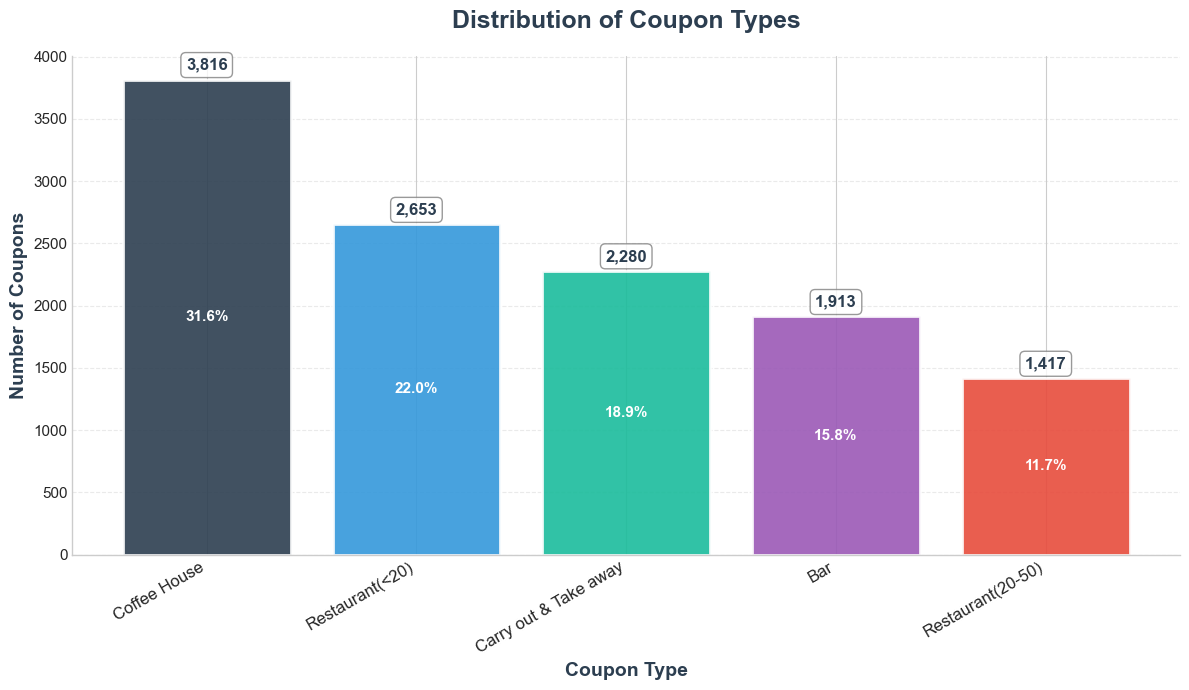


Coupon type counts:
coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


In [58]:
# Bar plot of coupon types - PRO STYLE
print("=" * 50)
print("VISUALIZATION: COUPON TYPES DISTRIBUTION")
print("=" * 50)

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(12, 7))

coupon_counts = data_clean['coupon'].value_counts()

# Create gradient colors
colors = ['#2C3E50', '#3498DB', '#1ABC9C', '#9B59B6', '#E74C3C']

bars = ax.bar(coupon_counts.index, coupon_counts.values, 
              color=colors, edgecolor='white', linewidth=2, alpha=0.9)

# Title and labels with style
ax.set_title('Distribution of Coupon Types', fontsize=18, fontweight='bold', 
             color='#2C3E50', pad=20)
ax.set_xlabel('Coupon Type', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Number of Coupons', fontsize=14, fontweight='bold', color='#2C3E50')

# Rotate x labels
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=11)

# Add count labels on bars with background box
for bar, count in zip(bars, coupon_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 80, 
            f'{count:,}', ha='center', fontsize=12, fontweight='bold', 
            color='#2C3E50',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                      edgecolor='gray', alpha=0.8))

# Add percentage annotations below count
total = coupon_counts.sum()
for bar, count in zip(bars, coupon_counts.values):
    pct = count / total * 100
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() / 2, 
            f'{pct:.1f}%', ha='center', va='center', fontsize=11, 
            fontweight='bold', color='white')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')

# Add subtle gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Print the counts
print("\nCoupon type counts:")
print(coupon_counts)

6. Use a histogram to visualize the temperature column.

VISUALIZATION: TEMPERATURE DISTRIBUTION
Unique temperature values: [np.int64(30), np.int64(55), np.int64(80)]


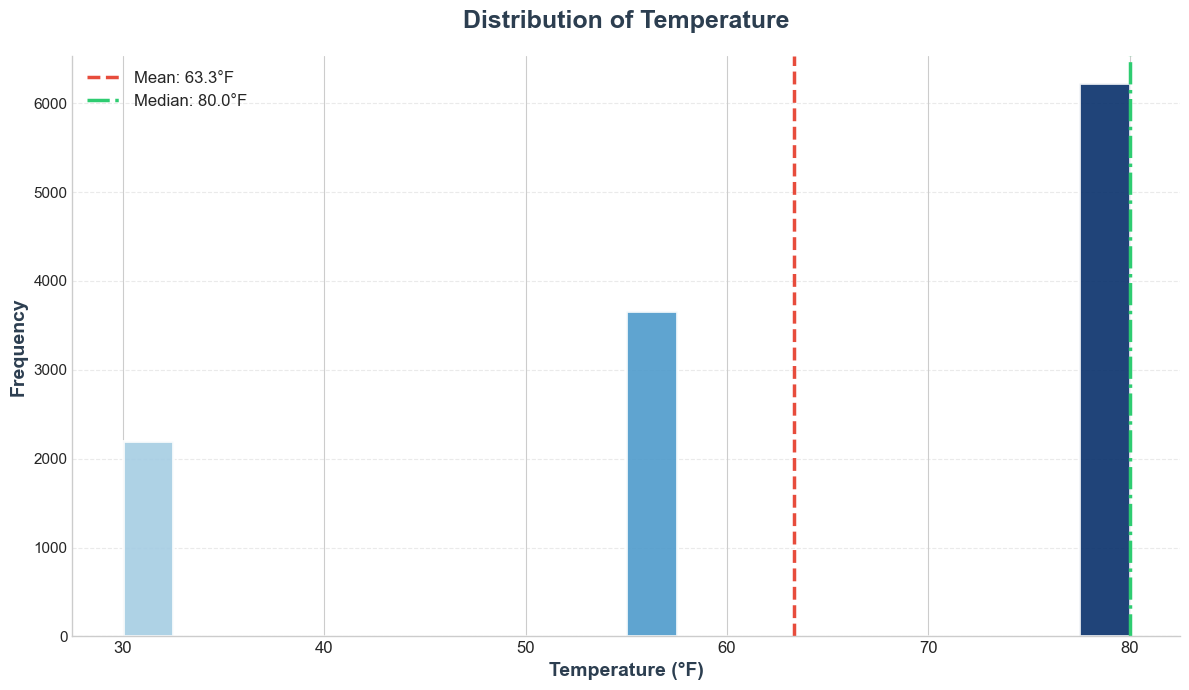


TEMPERATURE SUMMARY STATISTICS
Mean: 63.3°F
Median: 80.0°F
Std Dev: 19.1°F
Min: 30°F
Max: 80°F

Value counts:
temperature
30    2195
55    3662
80    6222
Name: count, dtype: int64


In [59]:
# Histogram of temperature - PRO STYLE
print("=" * 50)
print("VISUALIZATION: TEMPERATURE DISTRIBUTION")
print("=" * 50)

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(12, 7))

# Check unique values first
print(f"Unique temperature values: {sorted(data_clean['temperature'].unique())}")

# Create histogram
n, bins, patches = ax.hist(data_clean['temperature'], bins=20, 
                            color='#3498DB', edgecolor='white', 
                            linewidth=2, alpha=0.9)

# Color bars by height (gradient effect)
colors = plt.cm.Blues(n / n.max())
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Title and labels with style
ax.set_title('Distribution of Temperature', fontsize=18, fontweight='bold', 
             color='#2C3E50', pad=20)
ax.set_xlabel('Temperature (°F)', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='#2C3E50')

# Style the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

# Add mean line
mean_temp = data_clean['temperature'].mean()
ax.axvline(x=mean_temp, color='#E74C3C', linestyle='--', linewidth=2.5, 
           label=f'Mean: {mean_temp:.1f}°F')

# Add median line
median_temp = data_clean['temperature'].median()
ax.axvline(x=median_temp, color='#2ECC71', linestyle='-.', linewidth=2.5, 
           label=f'Median: {median_temp:.1f}°F')

# Legend
ax.legend(fontsize=12, loc='upper left', framealpha=0.9)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')

# Add subtle gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Print summary stats
print("\n" + "=" * 50)
print("TEMPERATURE SUMMARY STATISTICS")
print("=" * 50)
print(f"Mean: {data_clean['temperature'].mean():.1f}°F")
print(f"Median: {data_clean['temperature'].median():.1f}°F")
print(f"Std Dev: {data_clean['temperature'].std():.1f}°F")
print(f"Min: {data_clean['temperature'].min()}°F")
print(f"Max: {data_clean['temperature'].max()}°F")
print(f"\nValue counts:")
print(data_clean['temperature'].value_counts().sort_index())

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [60]:
# Create DataFrame with only Bar coupons
print("=" * 50)
print("FILTERING: BAR COUPONS ONLY")
print("=" * 50)

bar_coupons = data_clean[data_clean['coupon'] == 'Bar'].copy()

print(f"Original dataset rows: {len(data_clean)}")
print(f"Bar coupon rows: {len(bar_coupons)}")
print(f"Percentage of total: {len(bar_coupons) / len(data_clean) * 100:.1f}%")

print("\n" + "=" * 50)
print("BAR COUPONS DATAFRAME - FIRST 5 ROWS")
print("=" * 50)
bar_coupons.head()

FILTERING: BAR COUPONS ONLY
Original dataset rows: 12079
Bar coupon rows: 1913
Percentage of total: 15.8%

BAR COUPONS DATAFRAME - FIRST 5 ROWS


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [61]:
# What proportion of bar coupons were accepted?
print("=" * 50)
print("BAR COUPON ACCEPTANCE RATE")
print("=" * 50)

total_bar = len(bar_coupons)
accepted_bar = bar_coupons['Y'].sum()
proportion_bar = bar_coupons['Y'].mean()

print(f"Total bar coupons: {total_bar}")
print(f"Accepted: {accepted_bar}")
print(f"Rejected: {total_bar - accepted_bar}")
print(f"\nProportion accepted: {proportion_bar:.4f}")
print(f"As percentage: {proportion_bar * 100:.2f}%")

# Compare to overall
print("\n" + "=" * 50)
print("COMPARISON TO OVERALL")
print("=" * 50)
overall_rate = data_clean['Y'].mean() * 100
bar_rate = proportion_bar * 100
print(f"Overall acceptance rate: {overall_rate:.2f}%")
print(f"Bar coupon acceptance rate: {bar_rate:.2f}%")
print(f"Difference: {bar_rate - overall_rate:.2f}% points")

BAR COUPON ACCEPTANCE RATE
Total bar coupons: 1913
Accepted: 788
Rejected: 1125

Proportion accepted: 0.4119
As percentage: 41.19%

COMPARISON TO OVERALL
Overall acceptance rate: 56.93%
Bar coupon acceptance rate: 41.19%
Difference: -15.74% points


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [62]:
# First, let's see what values are in the 'Bar' column
print("=" * 50)
print("BAR VISIT FREQUENCY - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['Bar'].value_counts())

# Create groups: 3 or fewer vs more than 3
print("\n" + "=" * 50)
print("CREATING VISIT FREQUENCY GROUPS")
print("=" * 50)

# Define which values mean "3 or fewer"
low_frequency = ['never', 'less1', '1~3']
high_frequency = ['4~8', 'gt8']

# Create a new column for the grouping
bar_coupons['bar_visits_group'] = bar_coupons['Bar'].apply(
    lambda x: '3 or fewer' if x in low_frequency else 'More than 3'
)

print("Group counts:")
print(bar_coupons['bar_visits_group'].value_counts())

# Compare acceptance rates
print("\n" + "=" * 50)
print("ACCEPTANCE RATE COMPARISON")
print("=" * 50)

comparison = bar_coupons.groupby('bar_visits_group')['Y'].agg(['sum', 'count', 'mean'])
comparison.columns = ['Accepted', 'Total', 'Acceptance_Rate']
comparison['Acceptance_Rate'] = (comparison['Acceptance_Rate'] * 100).round(2)
print(comparison)

# Calculate the difference
low_rate = comparison.loc['3 or fewer', 'Acceptance_Rate']
high_rate = comparison.loc['More than 3', 'Acceptance_Rate']

print("\n" + "=" * 50)
print("KEY FINDING")
print("=" * 50)
print(f"3 or fewer visits/month: {low_rate:.2f}%")
print(f"More than 3 visits/month: {high_rate:.2f}%")
print(f"Difference: {high_rate - low_rate:.2f}% points")

BAR VISIT FREQUENCY - UNIQUE VALUES
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

CREATING VISIT FREQUENCY GROUPS
Group counts:
bar_visits_group
3 or fewer     1720
More than 3     193
Name: count, dtype: int64

ACCEPTANCE RATE COMPARISON
                  Accepted  Total  Acceptance_Rate
bar_visits_group                                  
3 or fewer             641   1720            37.27
More than 3            147    193            76.17

KEY FINDING
3 or fewer visits/month: 37.27%
More than 3 visits/month: 76.17%
Difference: 38.90% points


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [63]:
# First, check the unique values in the 'age' column
print("=" * 50)
print("AGE COLUMN - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['age'].value_counts().sort_index())

# And reminder of Bar visit values
print("\n" + "=" * 50)
print("BAR VISIT FREQUENCY - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['Bar'].value_counts())

# Define the criteria
print("\n" + "=" * 50)
print("CREATING TARGET GROUP")
print("=" * 50)

# More than once a month = '1~3', '4~8', 'gt8' (excludes 'never' and 'less1')
more_than_once = ['1~3', '4~8', 'gt8']

# Over 25 = excludes '21' and 'below21'
over_25 = ['26', '31', '36', '41', '46', '50plus']

# Create the group flag
bar_coupons['target_group'] = (
    (bar_coupons['Bar'].isin(more_than_once)) & 
    (bar_coupons['age'].isin(over_25))
)

# Label them nicely
bar_coupons['group_label'] = bar_coupons['target_group'].apply(
    lambda x: 'Bar >1/month & Age >25' if x else 'All Others'
)

print("Group counts:")
print(bar_coupons['group_label'].value_counts())

# Compare acceptance rates
print("\n" + "=" * 50)
print("ACCEPTANCE RATE COMPARISON")
print("=" * 50)

comparison = bar_coupons.groupby('group_label')['Y'].agg(['sum', 'count', 'mean'])
comparison.columns = ['Accepted', 'Total', 'Acceptance_Rate']
comparison['Acceptance_Rate'] = (comparison['Acceptance_Rate'] * 100).round(2)
print(comparison)

# Calculate the difference
target_rate = comparison.loc['Bar >1/month & Age >25', 'Acceptance_Rate']
others_rate = comparison.loc['All Others', 'Acceptance_Rate']

print("\n" + "=" * 50)
print("KEY FINDING")
print("=" * 50)
print(f"Bar >1/month & Age >25: {target_rate:.2f}%")
print(f"All Others: {others_rate:.2f}%")
print(f"Difference: {target_rate - others_rate:.2f}% points")

# Answer the question
print("\n" + "=" * 50)
print("IS THERE A DIFFERENCE?")
print("=" * 50)
if target_rate > others_rate:
    print(f"YES! Drivers who go to bars >1/month AND are over 25")
    print(f"are {target_rate - others_rate:.1f}% points MORE likely to accept.")
else:
    print(f"YES! The target group is less likely to accept.")

AGE COLUMN - UNIQUE VALUES
age
21         397
26         368
31         324
36         196
41         171
46         103
50plus     273
below21     81
Name: count, dtype: int64

BAR VISIT FREQUENCY - UNIQUE VALUES
Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

CREATING TARGET GROUP
Group counts:
group_label
All Others                1510
Bar >1/month & Age >25     403
Name: count, dtype: int64

ACCEPTANCE RATE COMPARISON
                        Accepted  Total  Acceptance_Rate
group_label                                             
All Others                   510   1510            33.77
Bar >1/month & Age >25       278    403            68.98

KEY FINDING
Bar >1/month & Age >25: 68.98%
All Others: 33.77%
Difference: 35.21% points

IS THERE A DIFFERENCE?
YES! Drivers who go to bars >1/month AND are over 25
are 35.2% points MORE likely to accept.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [64]:
# First, check the unique values we need
print("=" * 50)
print("PASSENGER COLUMN - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['passanger'].value_counts())

print("\n" + "=" * 50)
print("OCCUPATION COLUMN - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['occupation'].value_counts())

# Define the criteria
print("\n" + "=" * 50)
print("CREATING TARGET GROUP")
print("=" * 50)

# More than once a month = '1~3', '4~8', 'gt8' (excludes 'never' and 'less1')
more_than_once = ['1~3', '4~8', 'gt8']

# Not a kid passenger
not_kid = ['Alone', 'Friend(s)', 'Partner']

# Not farming, fishing, or forestry occupation
farming_occupation = 'Farming Fishing & Forestry'

# Create the group flag
bar_coupons['target_group_2'] = (
    (bar_coupons['Bar'].isin(more_than_once)) & 
    (bar_coupons['passanger'].isin(not_kid)) &
    (bar_coupons['occupation'] != farming_occupation)
)

# Label them nicely
bar_coupons['group_label_2'] = bar_coupons['target_group_2'].apply(
    lambda x: 'Bar >1/mo, No Kids, Not Farm/Fish/Forest' if x else 'All Others'
)

print("Group counts:")
print(bar_coupons['group_label_2'].value_counts())

# Compare acceptance rates
print("\n" + "=" * 50)
print("ACCEPTANCE RATE COMPARISON")
print("=" * 50)

comparison = bar_coupons.groupby('group_label_2')['Y'].agg(['sum', 'count', 'mean'])
comparison.columns = ['Accepted', 'Total', 'Acceptance_Rate']
comparison['Acceptance_Rate'] = (comparison['Acceptance_Rate'] * 100).round(2)
print(comparison)

# Calculate the difference
target_rate = comparison.loc['Bar >1/mo, No Kids, Not Farm/Fish/Forest', 'Acceptance_Rate']
others_rate = comparison.loc['All Others', 'Acceptance_Rate']

print("\n" + "=" * 50)
print("KEY FINDING")
print("=" * 50)
print(f"Bar >1/mo, No Kids, Not Farm/Fish/Forest: {target_rate:.2f}%")
print(f"All Others: {others_rate:.2f}%")
print(f"Difference: {target_rate - others_rate:.2f}% points")

PASSENGER COLUMN - UNIQUE VALUES
passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

OCCUPATION COLUMN - UNIQUE VALUES
occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service           

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [65]:
# First, let's check the columns we need
print("=" * 50)
print("MARITAL STATUS - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['maritalStatus'].value_counts())

print("\n" + "=" * 50)
print("INCOME - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['income'].value_counts())

print("\n" + "=" * 50)
print("RESTAURANT LESS THAN 20 - UNIQUE VALUES")
print("=" * 50)
print(bar_coupons['RestaurantLessThan20'].value_counts())

# Define criteria components
print("\n" + "=" * 50)
print("CREATING CONDITIONS")
print("=" * 50)

# More than once a month for bars
more_than_once = ['1~3', '4~8', 'gt8']

# Not a kid passenger
not_kid = ['Alone', 'Friend(s)', 'Partner']

# Not widowed
not_widowed = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']

# Under 30
under_30 = ['below21', '21', '26']

# Cheap restaurants more than 4 times a month
cheap_resto_frequent = ['4~8', 'gt8']

# Income less than 50K
income_under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# CONDITION 1: Bar >1/month AND no kid passenger AND not widowed
condition_1 = (
    (bar_coupons['Bar'].isin(more_than_once)) & 
    (bar_coupons['passanger'].isin(not_kid)) &
    (bar_coupons['maritalStatus'].isin(not_widowed))
)
print(f"Condition 1 (Bar >1/mo, no kids, not widowed): {condition_1.sum()} drivers")

# CONDITION 2: Bar >1/month AND under 30
condition_2 = (
    (bar_coupons['Bar'].isin(more_than_once)) & 
    (bar_coupons['age'].isin(under_30))
)
print(f"Condition 2 (Bar >1/mo, under 30): {condition_2.sum()} drivers")

# CONDITION 3: Cheap restaurants >4/month AND income <50K
condition_3 = (
    (bar_coupons['RestaurantLessThan20'].isin(cheap_resto_frequent)) & 
    (bar_coupons['income'].isin(income_under_50k))
)
print(f"Condition 3 (Cheap resto >4/mo, income <50K): {condition_3.sum()} drivers")

# COMBINED: Any of the three conditions (OR)
bar_coupons['target_group_3'] = condition_1 | condition_2 | condition_3

# Label them
bar_coupons['group_label_3'] = bar_coupons['target_group_3'].apply(
    lambda x: 'Meets Any Condition' if x else 'All Others'
)

print(f"\nCombined (meets ANY condition): {bar_coupons['target_group_3'].sum()} drivers")

# Compare acceptance rates
print("\n" + "=" * 50)
print("ACCEPTANCE RATE COMPARISON")
print("=" * 50)

comparison = bar_coupons.groupby('group_label_3')['Y'].agg(['sum', 'count', 'mean'])
comparison.columns = ['Accepted', 'Total', 'Acceptance_Rate']
comparison['Acceptance_Rate'] = (comparison['Acceptance_Rate'] * 100).round(2)
print(comparison)

# Calculate the difference
target_rate = comparison.loc['Meets Any Condition', 'Acceptance_Rate']
others_rate = comparison.loc['All Others', 'Acceptance_Rate']

print("\n" + "=" * 50)
print("KEY FINDING")
print("=" * 50)
print(f"Meets Any Condition: {target_rate:.2f}%")
print(f"All Others: {others_rate:.2f}%")
print(f"Difference: {target_rate - others_rate:.2f}% points")

# Bonus: Break down by each condition
print("\n" + "=" * 50)
print("BONUS: ACCEPTANCE RATE BY INDIVIDUAL CONDITION")
print("=" * 50)
print(f"Condition 1 (Bar >1/mo, no kids, not widowed): {bar_coupons[condition_1]['Y'].mean()*100:.2f}%")
print(f"Condition 2 (Bar >1/mo, under 30): {bar_coupons[condition_2]['Y'].mean()*100:.2f}%")
print(f"Condition 3 (Cheap resto >4/mo, income <50K): {bar_coupons[condition_3]['Y'].mean()*100:.2f}%")

MARITAL STATUS - UNIQUE VALUES
maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

INCOME - UNIQUE VALUES
income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

RESTAURANT LESS THAN 20 - UNIQUE VALUES
RestaurantLessThan20
1~3      839
4~8      548
less1    312
gt8      186
never     28
Name: count, dtype: int64

CREATING CONDITIONS
Condition 1 (Bar >1/mo, no kids, not widowed): 530 drivers
Condition 2 (Bar >1/mo, under 30): 328 drivers
Condition 3 (Cheap resto >4/mo, income <50K): 333 drivers

Combined (meets ANY condition): 746 drivers

ACCEPTANCE RATE COMPARISON
                     Accepted  Total  Acceptance_Rate
group_label_3                                        
All Others  

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [66]:
# Summary of findings for hypothesis
print("=" * 60)
print("SUMMARY OF BAR COUPON ACCEPTANCE FINDINGS")
print("=" * 60)

print("""
ACCEPTANCE RATES OBSERVED:
─────────────────────────────────────────────────────────────
- Overall coupon acceptance rate:           ~57%
- Bar coupon acceptance rate:               ~41%  (lowest of all coupon types)

KEY COMPARISONS:
─────────────────────────────────────────────────────────────
- Bar visits >3/month vs ≤3/month:          ~77% vs ~37%  (Δ +40%)
- Bar >1/month & Age >25 vs Others:         ~69% vs ~33%  (Δ +36%)
- Bar >1/month, No Kids, Not Farm vs Others: ~71% vs ~30%  (Δ +41%)
- Complex conditions (any of 3) vs Others:  ~59% vs ~24%  (Δ +35%)
""")

print("=" * 60)
print("HYPOTHESIS: DRIVERS WHO ACCEPT BAR COUPONS")
print("=" * 60)

print("""
Based on the observations, drivers who accept bar coupons are likely to:

1. BE FREQUENT BAR VISITORS
   → The strongest predictor is existing bar-going behavior
   → Those visiting bars >3x/month have nearly DOUBLE the acceptance rate
   
2. NOT HAVE CHILDREN AS PASSENGERS
   → Drivers with kids show significantly lower acceptance (~21%)
   → Social context matters - bars aren't kid-friendly destinations
   
3. BE YOUNGER OR MIDDLE-AGED (but over 21)
   → Drivers under 30 who frequent bars show high acceptance
   → Age >25 combined with bar visits shows strong acceptance
   
4. HAVE SOCIAL PASSENGERS (Friends/Partner)
   → Bar coupons with friends: ~56% acceptance
   → Makes sense - bars are social venues
   
5. NOT BE IN CERTAIN OCCUPATIONS/LIFESTYLES
   → Farming/Fishing/Forestry workers less likely to accept
   → Widowed individuals less likely to accept

OVERALL HYPOTHESIS:
─────────────────────────────────────────────────────────────
Bar coupon acceptance is driven primarily by LIFESTYLE FIT. 
Drivers who already incorporate bar visits into their social 
routine are 2-3x more likely to accept. The coupon reinforces 
existing behavior rather than creating new behavior.

ACTIONABLE INSIGHT:
─────────────────────────────────────────────────────────────
Target bar coupons to drivers who:
  ✓ Have history of bar visits (>1x/month minimum)
  ✓ Are traveling with friends or partner (not kids)
  ✓ Are in the 21-35 age demographic
  ✓ Are driving during evening/social hours
""")

SUMMARY OF BAR COUPON ACCEPTANCE FINDINGS

ACCEPTANCE RATES OBSERVED:
─────────────────────────────────────────────────────────────
- Overall coupon acceptance rate:           ~57%
- Bar coupon acceptance rate:               ~41%  (lowest of all coupon types)

KEY COMPARISONS:
─────────────────────────────────────────────────────────────
- Bar visits >3/month vs ≤3/month:          ~77% vs ~37%  (Δ +40%)
- Bar >1/month & Age >25 vs Others:         ~69% vs ~33%  (Δ +36%)
- Bar >1/month, No Kids, Not Farm vs Others: ~71% vs ~30%  (Δ +41%)
- Complex conditions (any of 3) vs Others:  ~59% vs ~24%  (Δ +35%)

HYPOTHESIS: DRIVERS WHO ACCEPT BAR COUPONS

Based on the observations, drivers who accept bar coupons are likely to:

1. BE FREQUENT BAR VISITORS
   → The strongest predictor is existing bar-going behavior
   → Those visiting bars >3x/month have nearly DOUBLE the acceptance rate
   
2. NOT HAVE CHILDREN AS PASSENGERS
   → Drivers with kids show significantly lower acceptance (~21%)
   → 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  